## Importation des bib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier


## Importation des données

In [ ]:
data = pd.read_csv('Cleaned_Data.csv')

In [ ]:
data.head()

,Unnamed: 0,Rating,Nominal_GDP(bil.LC),Nominal_GDP(bil.US$),GDP_per_capita(US$),Real_GDP_growth(%),Real_GDP_per_capita_growth(%),Real_investment_growth(%),Investment/GDP(%),Savings/GDP(%),Exports/GDP(%),Unemployment_rate(%of_workforce),CPI_growth(%),GDP_deflator_growth(%),Exchange_rate_year-end(LC/$),Banks_claims_on_resident_non-govt_sector_growth,Banks_claims_on_resident_non-govt_sector/GDP,GG_balance/GDP(%),Change_in_Net_GG_debt/GDP(%),Primary_GG_balance/GDP(%),GG_Revenues/GDP(%),GG_Expenditures/GDP(%),GG_interest_expenditure/revenues(%),Gross_GG_debt/GDP(%),Debt/Revenues(%),Net_GG_debt/GDP(%),Liquid_assets/GDP,CARs/GDP(%),Real_exports_growth(%),Current_account_balance/GDP(%),Current_account_balance/CARs(%),Usable_reserves/CAPs(months),Gross_ext.fin.needs/(CAR+use.res.)(%),Net_FDI/GDP(%),Trade_balance/GDP,Net_portfolio_equity_inflow/GDP,Narrow_net_ext.debt/CARs(%),Narrow_net_ext.debt/CAPs(%),Net_ext.liabilities/CARs(%),Short-term_external_debt_by_remaining_maturity/CARs,Usable_reserves(US$mil.),Gross_LT_commercial_borrowing(US$bil.),Commercial_debt_stock(year_end_US$bil.),ST_debt(US$bil.),Bi-/Multilateral_debt(%of_total),ST_debt(%of_total),FC_debt(%of_total),LT_fixed-rate_debt(%of_total),Roll-over ratio (% of debt),Roll-over_ratio(%of_GDP)
0,0,BBB,11.68,31.05,22659.37,2.49,-1.68,-8.53,25.53,23.11,83.11,3.5,1.85,-9.26,0.38,8.91,64.66,-13.00,18.35,-10.69,17.49,30.49,13.20,62.10,355.04,42.07,20.03,89.81,-0.85,-2.42,-2.70,0.21,307.43,-10.07,2.68,2.84,-51.28,-49.94,-116.71,210.16,-1553.89,3.0,18.8,5.305851,2.38,27.60,42.69,72.40,24.32,15.06
1,1,BB,12.12,32.23,22641.28,3.56,-0.33,10.78,29.15,24.52,74.20,4.3,2.79,0.25,0.38,2.92,64.10,-13.49,17.57,-10.50,15.66,29.14,19.08,77.64,495.85,58.09,19.55,80.80,-2.76,-4.63,-5.73,-0.68,361.98,3.49,-2.49,-3.25,-47.86,-45.26,-119.13,234.65,-3061.71,4.4,23.1,5.505319,1.82,23.39,47.64,76.61,33.34,24.34
2,2,B,13.34,35.47,23631.61,4.29,-1.09,10.57,32.94,28.86,75.78,4.2,1.39,5.52,0.38,7.68,62.72,-10.01,12.81,-6.42,16.50,26.52,21.77,85.17,516.12,65.60,19.57,81.74,3.69,-4.09,-5.00,-1.21,352.53,3.37,-1.55,0.81,-47.55,-45.29,-106.95,210.30,-4179.92,6.3,28.2,5.821809,0.00,21.42,50.94,79.32,26.84,21.31
3,3,B,14.16,37.65,25051.06,1.72,1.59,9.51,35.00,28.54,79.56,4.0,2.09,4.35,0.38,10.67,65.40,-6.32,13.41,-1.95,19.60,25.92,22.30,91.92,468.91,75.22,16.70,85.99,3.26,-6.47,-7.52,-1.44,329.63,4.10,-2.83,-2.60,-26.21,-24.37,-74.55,179.55,-5872.03,2.8,31.8,5.954787,4.02,19.10,50.00,65.60,23.80,20.91
4,4,B,14.47,38.47,25929.95,1.99,3.32,1.41,33.08,31.01,76.84,4.0,1.00,0.18,0.38,1.90,65.22,-4.73,9.40,-0.28,20.06,24.79,22.19,100.50,500.98,83.02,17.48,82.90,0.38,-2.06,-2.49,-2.16,367.19,4.41,2.23,-1.52,-43.21,-42.16,-82.82,197.10,-5093.77,3.3,31.5,5.319149,12.70,16.30,52.90,68.20,26.83,25.09


In [ ]:
data.Rating.value_counts()

B      181
BBB    147
BB     125
AA     111
A       87
AAA     59
CCC     19
Name: Rating, dtype: int64

In [ ]:
del data['Unnamed: 0']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X = data.drop(['Rating'], axis = 1)
y=le.fit_transform(data['Rating'])

In [ ]:
le.classes_

array(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'CCC'], dtype=object)

In [ ]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

{'A': 0, 'AA': 1, 'AAA': 2, 'B': 3, 'BB': 4, 'BBB': 5, 'CCC': 6}

In [ ]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=30, cv=5)
selector.fit(X, y)
X_new = selector.fit_transform(X, y)

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=44, shuffle=True)

In [ ]:
print('Input Shape', (X_train.shape))
print('Output Shape', (X_test.shape))

Input Shape (619, 39)
Output Shape (110, 39)


## Regression logistique

In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.8093699515347335
0.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


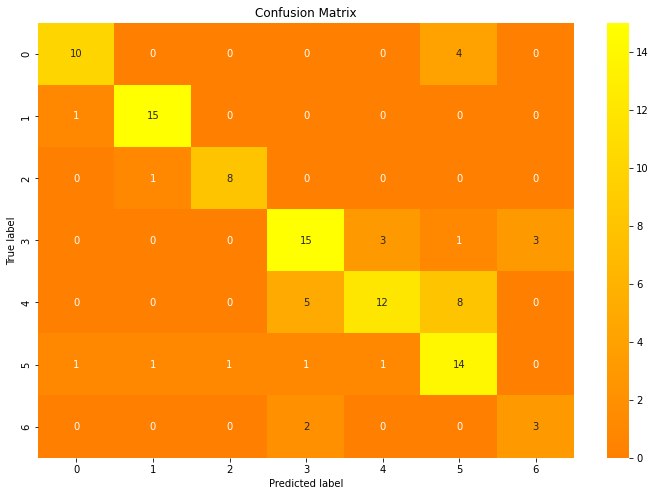

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

In [ ]:
from sklearn.metrics import cohen_kappa_score, balanced_accuracy_score, roc_auc_score

cohen_kappa_score(y_test, y_predict_test_logreg)


0.6416584402764067

In [ ]:
balanced_accuracy_score(y_test, y_predict_test_logreg, adjusted=True)

0.6732224817093236

In [ ]:
y_probs_lg = logreg.predict_proba(X_test)

roc_auc_score(y_test, y_probs_lg, average="weighted", multi_class="ovr")

0.9299415372773749

## SVM

In [ ]:
sm = svm.SVC(probability=True).fit(X_train,y_train)
pred_train_svm = sm.predict(X_train)
y_pred_svm = sm.predict(X_test)
print ('Best CVal on training:',accuracy_score(y_train, pred_train_svm))
print ('Best Model on testing:', accuracy_score(y_test, y_pred_svm))

Best CVal on training: 0.8594507269789984
Best Model on testing: 0.7545454545454545


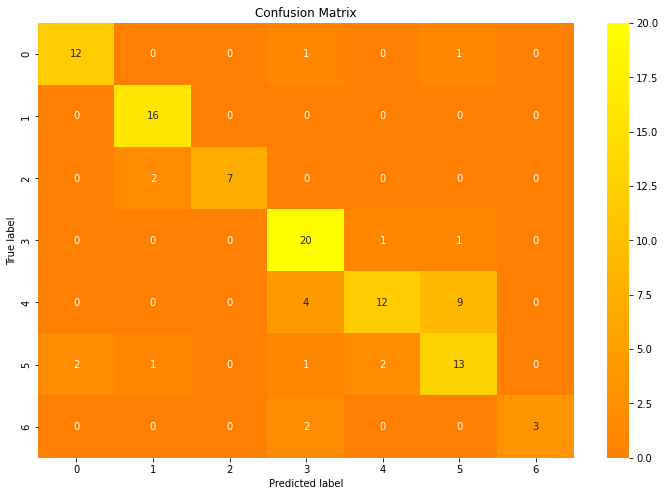

In [ ]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
draw_confusion_matrix(cm_svm)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred_svm)


0.7052109181141439

In [ ]:
balanced_accuracy_score(y_test, y_pred_svm, adjusted=True)

0.7180370117212221

In [ ]:
y_probs_svm = sm.predict_proba(X_test)

roc_auc_score(y_test, y_probs_svm, average="weighted", multi_class="ovr")

0.9636219203294525

In [ ]:
labels = [0,1,2,3,4,5,6]
print(classification_report(y_test, y_probs_svm),target_names=labels)

ValueError: ignored